In [1]:
%pip install Bio
%pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.0/281.0 kB 1.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 4.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.6/64.6 kB 2.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import Bio
from Bio.Seq import Seq

In [3]:
from Bio import SeqIO

In [4]:
file_fasta = SeqIO.read('5_sequence.fasta', 'fasta').seq
file_fasta


Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA')

In [5]:
file_gb = SeqIO.read("5_sequence.gb", "gb").seq

file_gb

Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA')

In [6]:
# Given sequence
# Sequence A:
# AGCTTGCAGCGTCCGTTAGCTCGAGTCCAGGACGTTAGTCCTGCAGTC
# Sequence B:
# CAGTAAGTTGCCGTTAGCGCGTAGTGCCAGTAAGCGGCTCGTTAGTGG

In [7]:
seq_a = Seq('AGCTTGCAGCGTCCGTTAGCTCGAGTCCAGGACGTTAGTCCTGCAGTC')
seq_b = Seq('CAGTAAGTTGCCGTTAGCGCGTAGTGCCAGTAAGCGGCTCGTTAGTGG')

In [8]:
# Find the length of both sequences.
print(len(seq_a))
print(len(seq_a))

48
48


In [9]:
# Determine the number of times the codon (CGC) appears in both sequences
print(seq_a.count('CGC'))
print(seq_b.count('CGC'))

0
1


In [10]:
# Locate the first occurrence index position of the sub-sequence (CAGTC)
# in both sequences.
print(seq_a.find('CAGTC'))
print(seq_b.find('CAGTC'))

43
-1


In [11]:
# Combine the first 15 nucleotides from sequence A
# and the last 10 nucleotides from sequence B
# to create a new DNA sequence called sequence C.
seq_c = seq_a[ : 15] + seq_b[-10 : ]
print(seq_c)

AGCTTGCAGCGTCCGTCGTTAGTGG


In [12]:
# Reverse the sequence of sequence C.
seq_c = seq_c[ : : -1]
print(seq_c)

GGTGATTGCTGCCTGCGACGTTCGA


In [13]:
# Plot the nucleotide base
# (A, C, G, T)  for the sequence A
# AT for sequence B,
# GC for sequence C
import matplotlib.pyplot as plt
from collections import Counter

Counter({'G': 14, 'C': 14, 'T': 12, 'A': 8})


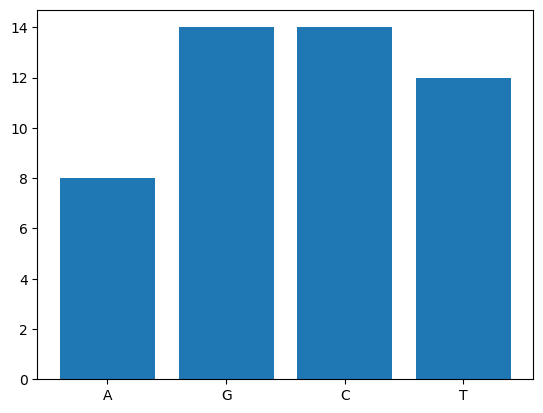

In [14]:
# (A, C, G, T)  for the sequence A
freq_a = Counter(seq_a)
print(freq_a)

plt.bar(freq_a.keys(), freq_a.values())
plt.show()

Counter({'G': 17, 'T': 12, 'C': 10, 'A': 9})


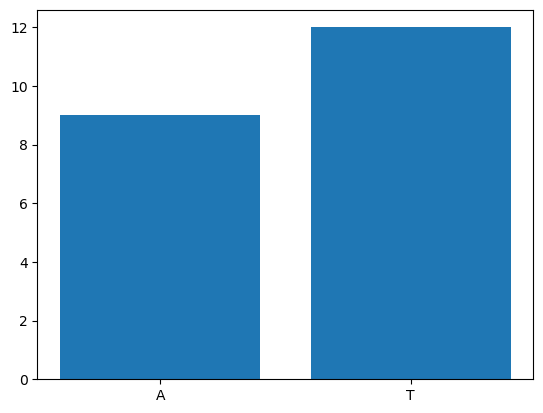

In [15]:
# AT for sequence B,
freq_b = Counter(seq_b)
print(freq_b)

plt.bar(['A', 'T'], [freq_b['A'], freq_b['T']])
plt.show()

Counter({'G': 9, 'T': 7, 'C': 6, 'A': 3})


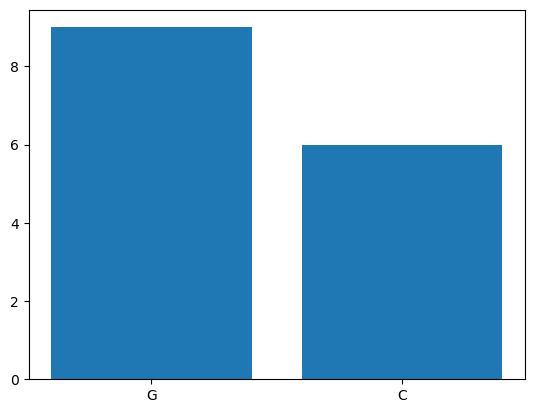

In [16]:
# GC for sequence C
freq_c = Counter(seq_c)
print(freq_c)

plt.bar(['G', 'C'], [freq_c['G'], freq_c['C']])
plt.show()

In [17]:
# Cari 'A' ketemu di index berapa aja di seq A
from Bio.SeqUtils import nt_search

print(nt_search(str(seq_a), 'A'))

['A', 0, 7, 17, 23, 28, 31, 36, 44]


In [18]:
# Calculate the GC and AT content of sequence A

from Bio.SeqUtils import molecular_weight as mw, MeltingTemp as mt

In [19]:
# Refer to the Wallace rule to calculate the melting point of sequence A,
# serta neigbor dan gc
print(mt.Tm_GC(seq_a))
print(mt.Tm_Wallace(seq_a))
print(mt.Tm_NN(seq_a))

71.31956873864458
152.0
73.44322665093074


In [20]:
# Cari molecular weight
print(mw(seq_a))

14831.413499999999


In [21]:
# Ubah seq c jadi mRNA dan ubah dari mRNA ke amino acid,
# kemudian back transcribe
mRNA_c = seq_c.transcribe()
print(mRNA_c)

amino_acid_c = mRNA_c.translate()
print(amino_acid_c)

GGUGAUUGCUGCCUGCGACGUUCGA
GDCCLRRS


/opt/anaconda3/lib/python3.12/site-packages/Bio/Seq.py:2879: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


In [22]:
from Bio import pairwise2

/opt/anaconda3/lib/python3.12/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


In [23]:
# Cari local alignment seq a dan seq b, serra tunjukkan score
local = pairwise2.align.localxx(seq_b, seq_c, score_only=True)
print(local)

22.0


In [24]:
# Cari global alignment seq a dan seq b, serra tunjukkan score
_global = pairwise2.align.globalxx(seq_b, seq_c, score_only=True)
print(_global)

22.0


In [25]:
# Hamming Distance antara seq a dan seq c
def foo(seq_1, seq_2):
  counter = 0

  for i, j in zip(seq_1, seq_2):
    if i != j:
      counter += 1

  return counter

print(foo(seq_a, seq_c))

19


In [26]:
# Levenshtein distance antara seq a dan seq c
!pip install python-Levenshtein

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.3/374.3 kB 2.0 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 3.9 MB/s eta 0:00:0000:0100:01
  Created wheel for Levenshtein: filename=levenshtein-0.26.0-cp312-cp312-macosx_10_16_x86_64.whl size=124397 sha256=2258a7b64390d2747bc5dd13555e524a072c0495f4924bba0e917982e52620b1
  Stored in directory: /Users/irfanheranurrohman/Library/Caches/pip/wheels/55/62/87/4aad4c92373357dc5841529daf2055f5a17d42f41d887b3e64
Successfully built Levenshtein


In [27]:
import Levenshtein

In [28]:
from Levenshtein import distance
distance(seq_a, seq_c)

27